## The study is based on the "energydata_complete.csv" dataset which was retrieved from the UCI Machine Learning repository website which consists of Appliance energy consumption along with other various features that affect the consumption like temperature and humidity conditions in various rooms of the house, temperature and humidity in nearby areas and other weather data which was collected separately from a nearby weather station and then merged with this dataset.
## The purpose of using this dataset is to analyze which factors have the most effect on consumption and what type of model is most suitable for making predictions on this real-world data. This is a regression problem as the target variable 'Appliances energy consumption' is numeric. Key features are the various temperature and humidity variables.

In [316]:
# Auto in python v5 by Prof. Christiam Horn was used to get the utility function added under utilities for histogram.

In [317]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statistics as stats
import math
import sys
np.set_printoptions(threshold=sys.maxsize)
sns.set() 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.reset_option('future.no_silent_downcasting', True)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## Utilities

In [319]:
def histogram(data, bins=None, xlim=None, title=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
        fig.set_size_inches(4,3)
    mean = stats.mean(data)
    sd = stats.pstdev(data)
    quantiles = stats.quantiles(data, n=1000)
    xmin = math.floor(quantiles[0])
    xmax = math.ceil(quantiles[-1])
    
    # Histogram
    if bins is None:
        bins = [x+0.5 for x in range(xmin,xmax,1)]

    if xlim is None:
        ax.set_xlim(xmin,xmax)
    else:
        ax.set_xlim(xlim[0], xlim[1])
        
    plt.hist(data, bins=bins, density=True)
    
    # pdf
    D = stats.NormalDist(mu=mean, sigma=sd)
    X = [ float(x) for x in np.linspace(xmin,xmax,1000) ]
    Y = [ D.pdf(x) for x in X ]
    plt.plot(X, Y, 'r-', lw=1)
        
    if title is not None:
        plt.title(title)
    plt.grid()

## Importing the dataset and performing initial inspection

In [321]:
# Importing the dataset
data = pd.read_csv("D:\\NCI Docs\\NCI LECS\\Data Mining and Machine Learning\\100% Project\\probable files for final datasets\\appliances+energy+prediction\\energydata_complete.csv")
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  
4  10.084097

In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [323]:
data.shape

(19735, 29)

In [324]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [325]:
data.isnull().sum()  # Checking for missing values

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

##### No missing values are present in any of the columns or features

In [327]:
data.duplicated().sum()       # Checking for number of duplicate rows

0

##### No duplicate entries or rows are present

In [329]:
data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

##### All the columns or features in the dataset are numerical except for date which is of 'object type'

In [331]:
data['date'] = pd.to_datetime(data['date'])

In [332]:
data.describe().T         # Creating a basic summary of data and transposing it for visual representation

count                 mean                  min  \
date           19735  2016-03-20 05:30:00  2016-01-11 17:00:00   
Appliances   19735.0            97.694958                 10.0   
lights       19735.0             3.801875                  0.0   
T1           19735.0            21.686571                16.79   
RH_1         19735.0            40.259739            27.023333   
T2           19735.0            20.341219                 16.1   
RH_2         19735.0             40.42042            20.463333   
T3           19735.0            22.267611                 17.2   
RH_3         19735.0              39.2425            28.766667   
T4           19735.0            20.855335                 15.1   
RH_4         19735.0            39.026904                27.66   
T5           19735.0            19.592106                15.33   
RH_5         19735.0            50.949283               29.815   
T6           19735.0             7.910939               -6.065   
RH_6         19735.0            54.609083                  1.0   
T7           19735.0            20.267106                15.39   
RH_7         19735.0              35.3882                 23.2   
T8           19735.0            22.029107            16.306667   
RH_8         19735.0            42.936165                 29.6   
T9           19735.0            19.485828                14.89   
RH_9         19735.0            41.552401            29.166667   
T_out        19735.0             7.411665                 -5.0   
Press_mm_hg  19735.0           755.522602                729.3   
RH_out       19735.0            79.750418                 24.0   
Windspeed    19735.0             4.039752                  0.0   
Visibility   19735.0            38.330834                  1.0   
Tdewpoint    19735.0             3.760707                 -6.6   
rv1          19735.0            24.988033             0.005322   
rv2          19735.0            24.988033             0.005322   

                             25%                  50%                  75%  \
date         2016-02-14 23:15:00  2016-03-20 05:30:00  2016-04-23 11:45:00   
Appliances                  50.0                 60.0                100.0   
lights                       0.0                  0.0                  0.0   
T1                         20.76                 21.6                 22.6   
RH_1                   37.333333            39.656667            43.066667   
T2                         18.79                 20.0                 21.5   
RH_2                        37.9                 40.5                43.26   
T3                         20.79                 22.1                23.29   
RH_3                        36.9                38.53                41.76   
T4                         19.53            20.666667                 22.1   
RH_4                       35.53                 38.4            42.156667   
T5                       18.2775                19.39            20.619643   
RH_5                        45.4                49.09            53.663333   
T6                      3.626667                  7.3               11.256   
RH_6                      30.025                55.29            83.226667   
T7                          18.7            20.033333                 21.6   
RH_7                        31.5            34.863333                 39.0   
T8                         20.79                 22.1                23.39   
RH_8                   39.066667               42.375               46.536   
T9                          18.0                19.39                 20.6   
RH_9                        38.5                 40.9            44.338095   
T_out                   3.666667             6.916667            10.408333   
Press_mm_hg           750.933333                756.1           760.933333   
RH_out                 70.333333            83.666667            91.666667   
Windspeed                    2.0             3.666667                  5.5   
Visibi

#### Correlation

In [334]:
corr = data.corr(method = 'spearman',numeric_only=True)
corr

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.302420  0.244049  0.060519  0.305091 -0.119736   
lights         0.302420  1.000000 -0.018083  0.109878  0.023240  0.046078   
T1             0.244049 -0.018083  1.000000  0.139379  0.842699  0.001647   
RH_1           0.060519  0.109878  0.139379  1.000000  0.285556  0.800146   
T2             0.305091  0.023240  0.842699  0.285556  1.000000 -0.087800   
RH_2          -0.119736  0.046078  0.001647  0.800146 -0.087800  1.000000   
T3             0.216852 -0.111071  0.867120  0.181513  0.692251  0.118692   
RH_3          -0.057066  0.106702 -0.018128  0.864318  0.149560  0.706736   
T4             0.207153 -0.004026  0.817931  0.062698  0.707018 -0.045464   
RH_4          -0.020233  0.097289  0.114480  0.896559  0.269920  0.742242   
T5             0.185846 -0.075272  0.852400  0.155213  0.682488  0.107821   
RH_5          -0.044904  0.100363 -0.039149  0.472506  0.037326  0.409437   
T6             0.242477 -0.072425  0.618667  0.337855  0.734568  0.103338   
RH_6          -0.229734  0.154858 -0.602322  0.285348 -0.501776  0.363577   
T7             0.181876 -0.138237  0.779169 -0.047252  0.586138 -0.074641   
RH_7          -0.119409  0.018519  0.134102  0.807273  0.239435  0.709785   
T8             0.236147 -0.083419  0.805314 -0.033775  0.571941 -0.034999   
RH_8          -0.217236 -0.004153 -0.019244  0.722760  0.059817  0.687581   
T9             0.166976 -0.173581  0.788328  0.044932  0.600179  0.036864   
RH_9          -0.164553 -0.037013  0.062373  0.755950  0.164936  0.689810   
T_out          0.215504 -0.072943  0.648714  0.368561  0.740147  0.146277   
Press_mm_hg   -0.096176  0.009609 -0.128284 -0.319049 -0.148919 -0.261522   
RH_out        -0.269086  0.046433 -0.295782  0.234132 -0.416548  0.483762   
Windspeed      0.112320  0.053703 -0.059815  0.209053  0.129877  0.075250   
Visibility    -0.003546  0.012745 -0.039126 -0.018776 -0.033461 -0.017766   
Tdewpoint      0.075221 -0.043718  0.531807  0.631137  0.550505  0.524499   
rv1           -0.009289  0.002289 -0.007706 -0.001342 -0.010332  0.007354   
rv2           -0.009289  0.002289 -0.007706 -0.001342 -0.010332  0.007354   

                   T3      RH_3        T4      RH_4        T5      RH_5  \
Appliances   0.216852 -0.057066  0.207153 -0.020233  0.185846 -0.044904   
lights      -0.111071  0.106702 -0.004026  0.097289 -0.075272  0.100363   
T1           0.867120 -0.018128  0.817931  0.114480  0.852400 -0.039149   
RH_1         0.181513  0.864318  0.062698  0.896559  0.155213  0.472506   
T2           0.692251  0.149560  0.707018  0.269920  0.682488  0.037326   
RH_2         0.118692  0.706736 -0.045464  0.742242  0.107821  0.409437   
T3           1.000000 -0.041695  0.806025  0.099826  0.875816 -0.112976   
RH_3        -0.041695  1.000000 -0.151935  0.889378 -0.061183  0.553325   
T4           0.806025 -0.151935  1.000000 -0.058348  0.824774 -0.135995   
RH_4         0.099826  0.889378 -0.058348  1.000000  0.088460  0.513571   
T5           0.875816 -0.061183  0.824774  0.088460  1.000000 -0.052765   
RH_5        -0.112976  0.553325 -0.135995  0.513571 -0.052765  1.000000   
T6           0.652874  0.089139  0.610804  0.284577  0.596726 -0.073264   
RH_6        -0.668288  0.527961 -0.708532  0.402452 -0.648743  0.385309   
T7           0.810359 -0.267148  0.822539 -0.155681  0.830710 -0.206994   
RH_7         0.135184  0.825432  0.016024  0.884393  0.126041  0.504770   
T8           0.794469 -0.238806  0.763084 -0.110986  0.813258 -0.142818   
RH_8        -0.009906  0.805571 -0.132280  0.816977 -0.020910  0.536282   
T9           0.887513 -0.218211  0.841655 -0.065146  0.885115 -0.202595   
RH_9         0.099335  0.806955 -0.050318  0.824523  0.048448  0.447974   
T_out        0.665229  0.135750  0.622529  0.320031  0.615454 -0.035393   
Press_mm_hg -0.191373 -0.276579 -0.048376 -0.312084 -0.191369 -0.182491   
RH_out      -0.259917  0.340404 -0.351335  0.314637 -0

<Axes: >

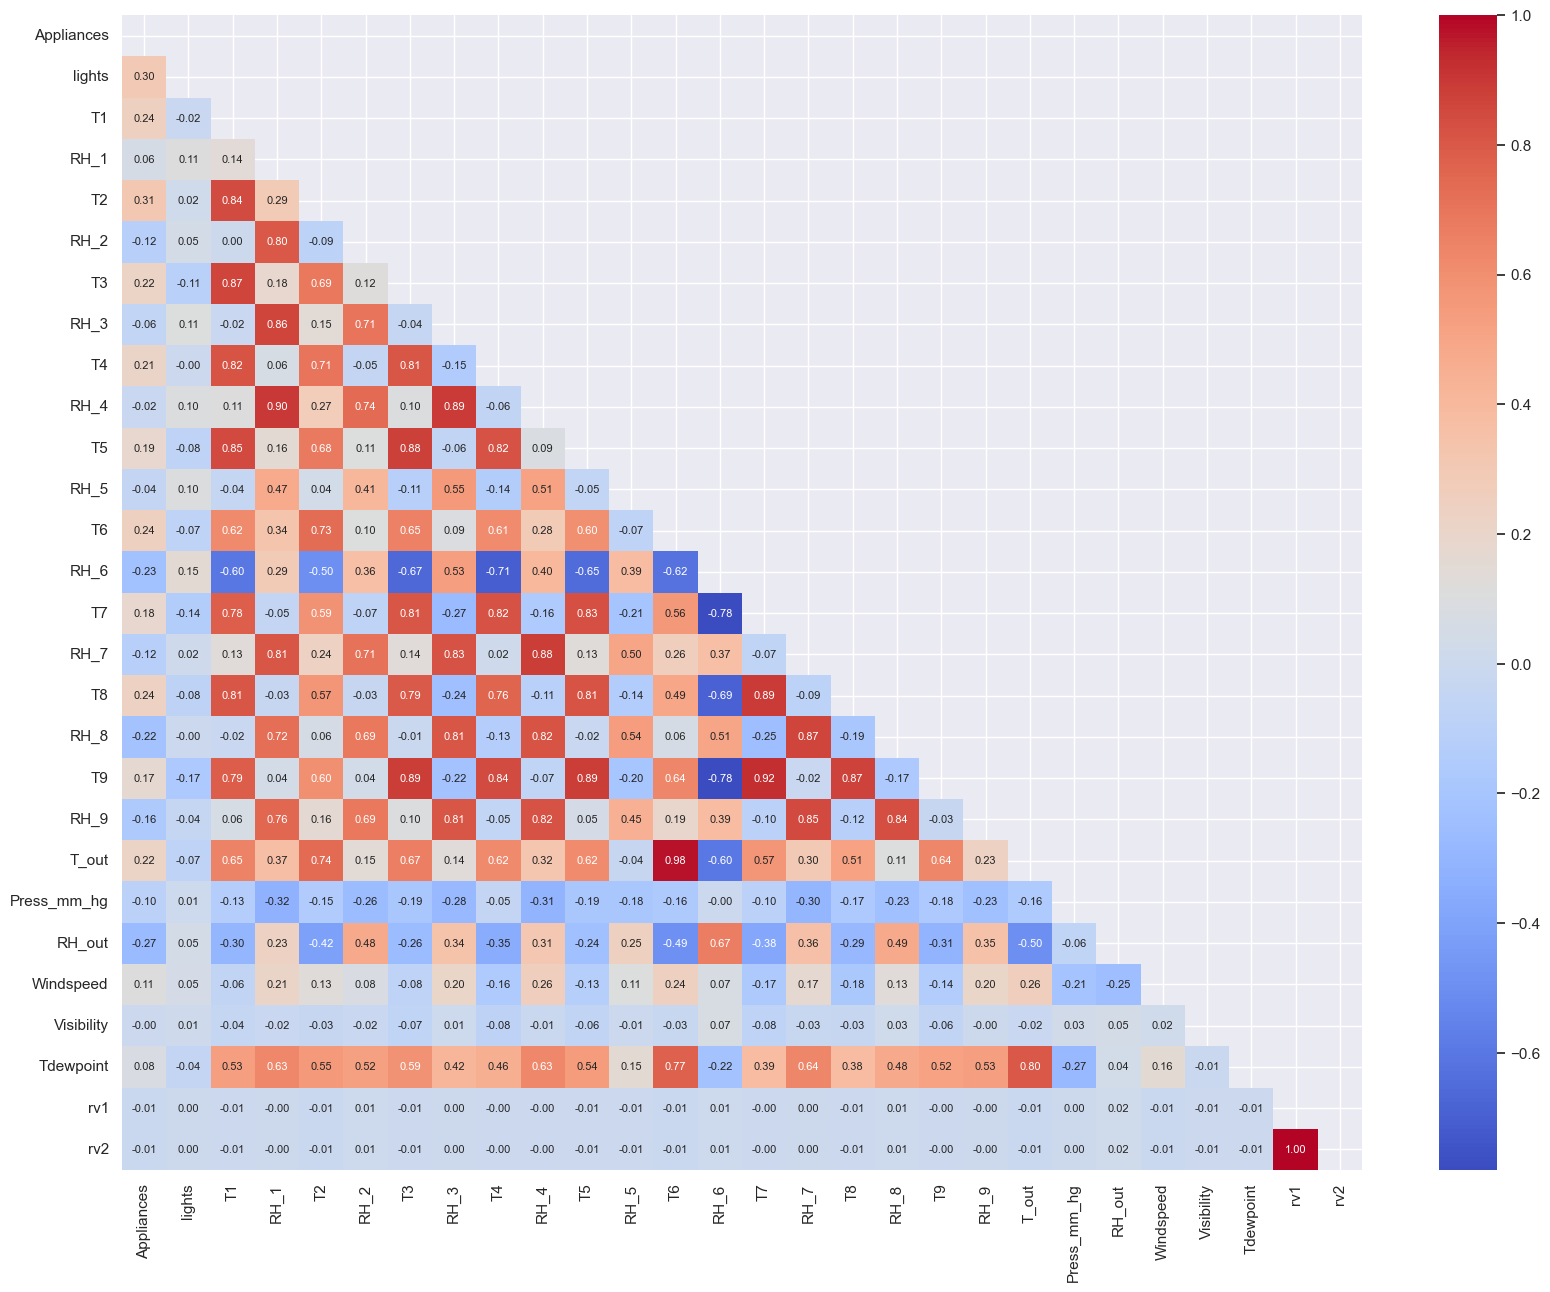

In [335]:
# Creating a heatmap of correlations
plt.figure(figsize=(20,15))

#Getting the upper triangle for better understanding
matrix = np.triu(corr)

# Setting annot=True for values of respective correlations to be displayed
sns.heatmap(corr,annot=True,cmap = 'coolwarm',fmt='.2f',annot_kws={'size':8},mask=matrix)

In [336]:
data.drop(columns=['rv1','rv2'],inplace=True)

In [337]:
# Creating a grid of histograms for each variable to see if the distribution is normal or not

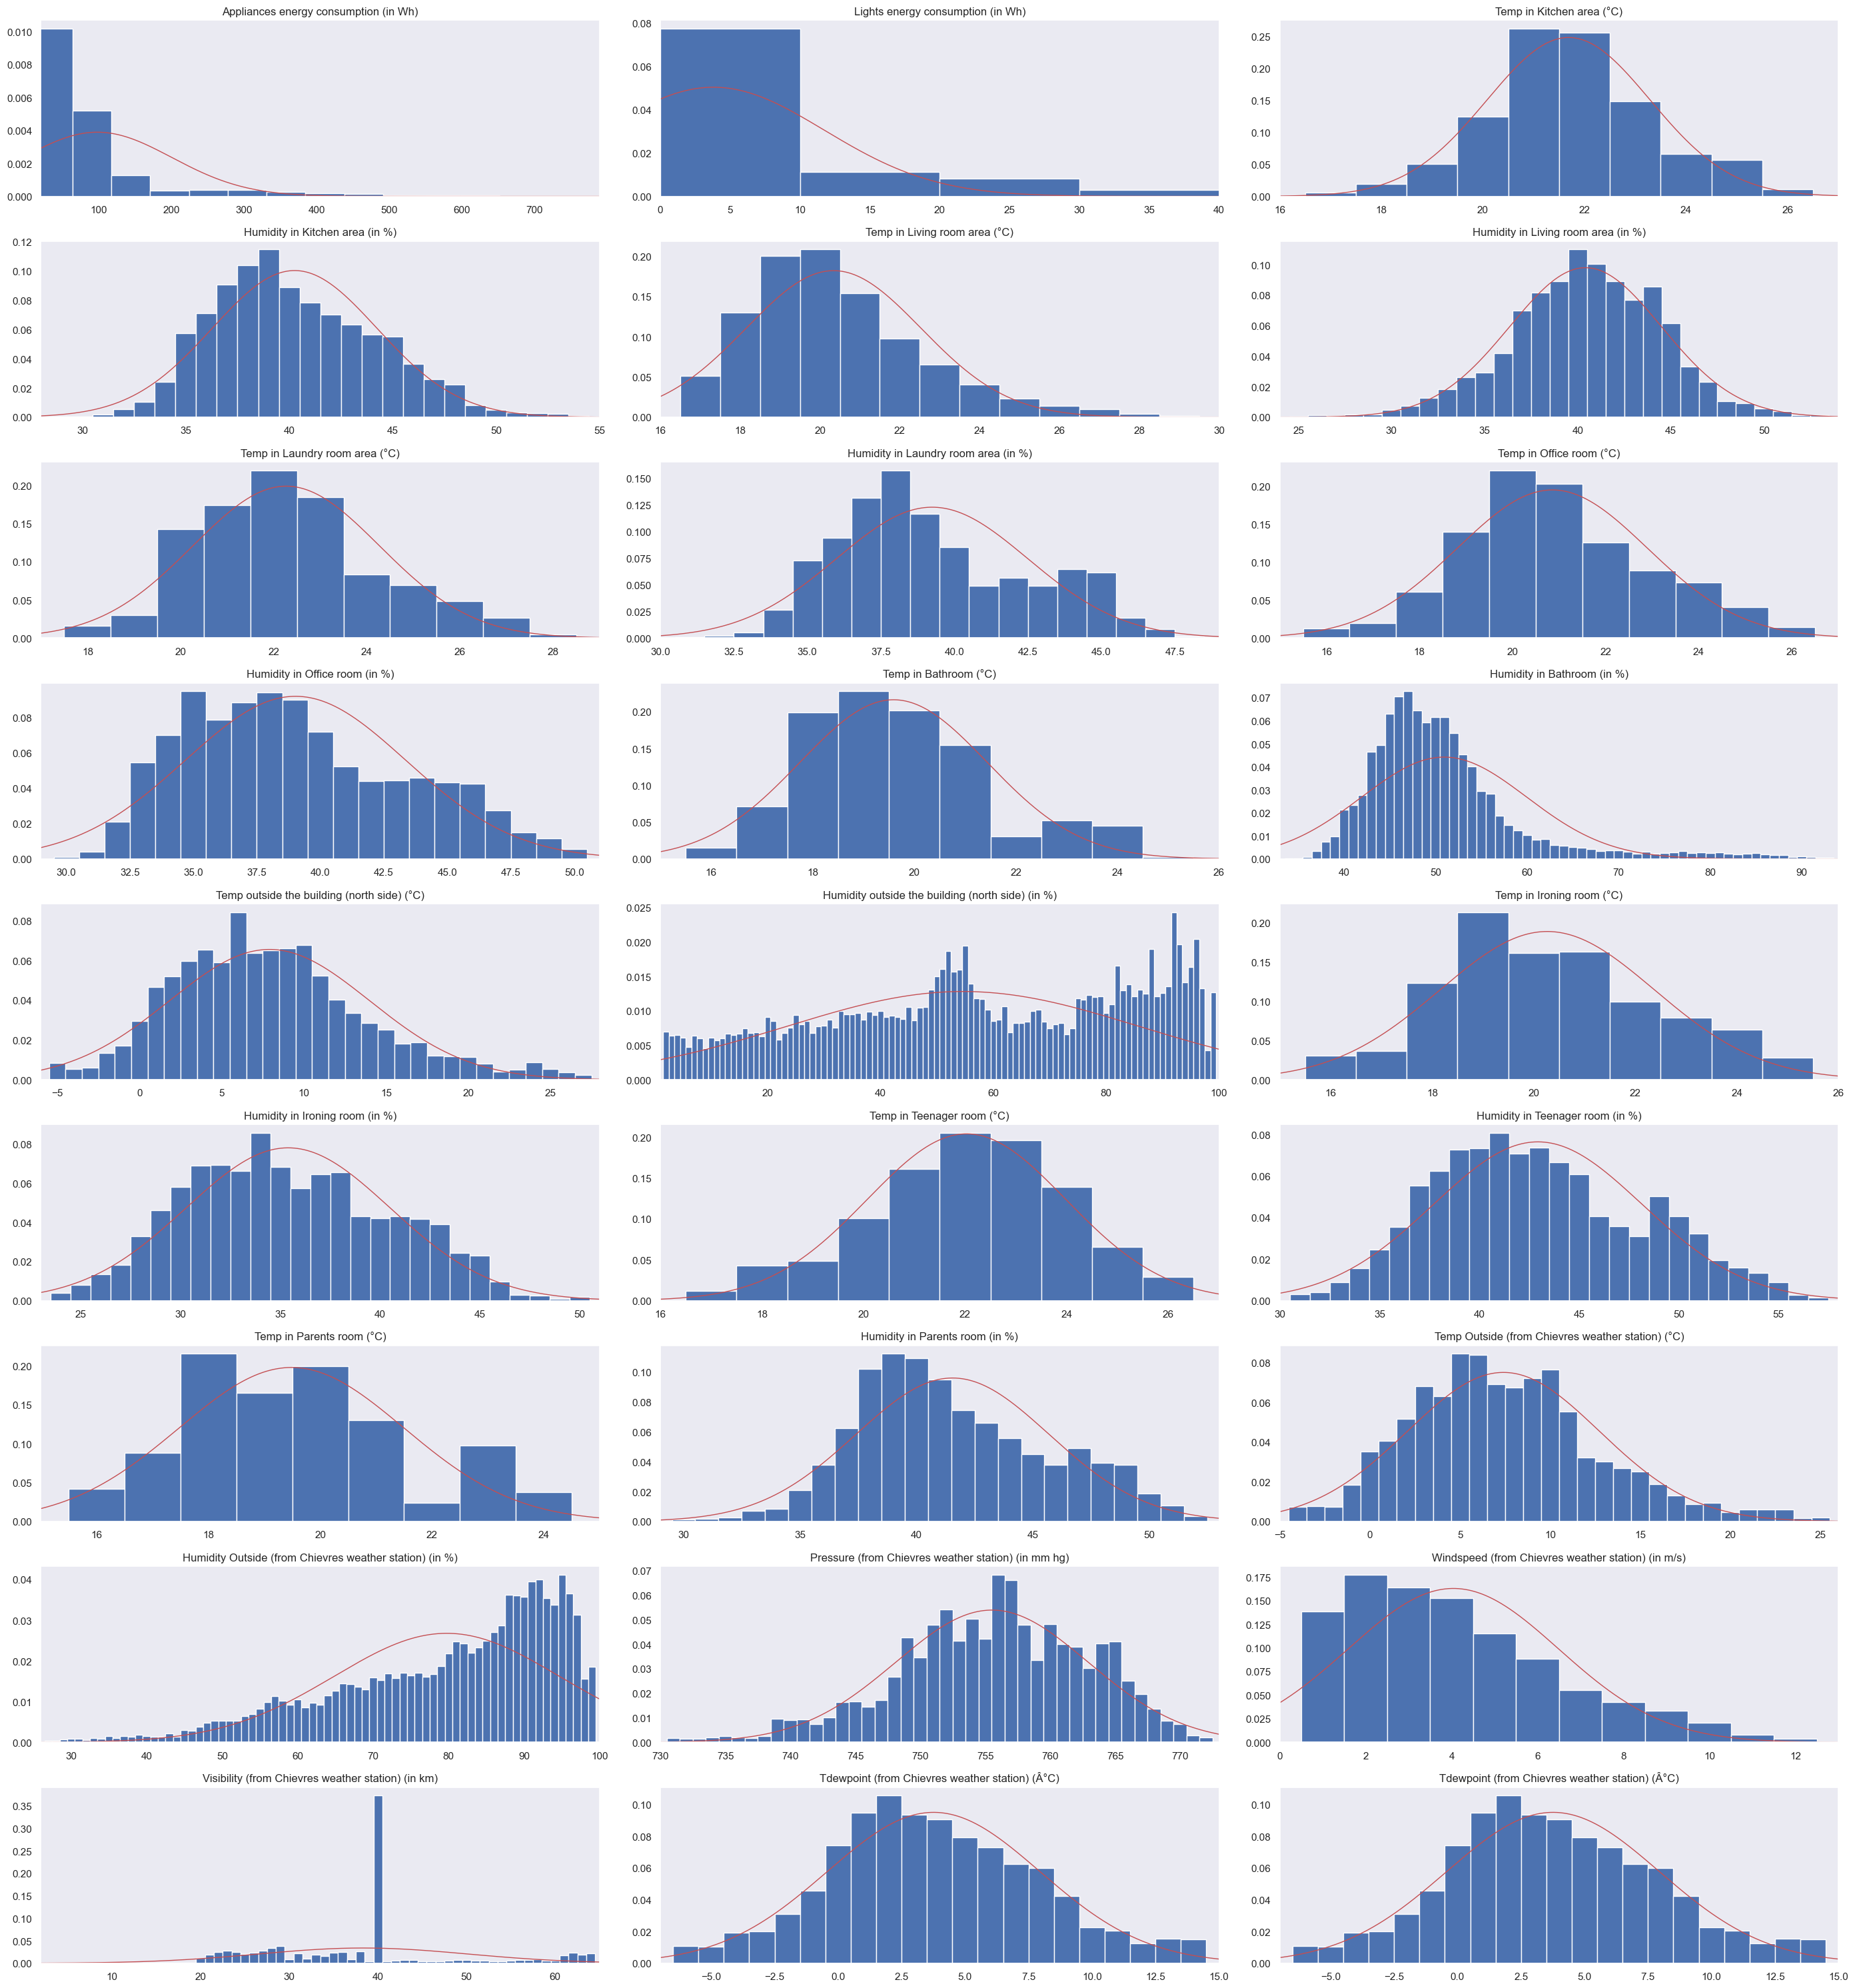

In [338]:
fig = plt.figure()
fig.set_size_inches(28,30)
histogram(data.Appliances, bins = 20, title='Appliances energy consumption (in Wh)', ax=plt.subplot(9,3,1))
histogram(data.lights, bins =7, title='Lights energy consumption (in Wh)', ax=plt.subplot(9,3,2))
histogram(data.T1, title='Temp in Kitchen area (°C)', ax=plt.subplot(9,3,3))
histogram(data.RH_1, title='Humidity in Kitchen area (in %)', ax=plt.subplot(9,3,4))
histogram(data.T2, title='Temp in Living room area (°C)', ax=plt.subplot(9,3,5))
histogram(data.RH_2, title='Humidity in Living room area (in %)', ax=plt.subplot(9,3,6))
histogram(data.T3, title='Temp in Laundry room area (°C)', ax=plt.subplot(9,3,7))
histogram(data.RH_3, title='Humidity in Laundry room area (in %)', ax=plt.subplot(9,3,8))
histogram(data.T4, title='Temp in Office room (°C)', ax=plt.subplot(9,3,9))
histogram(data.RH_4, title='Humidity in Office room (in %)', ax=plt.subplot(9,3,10))
histogram(data.T5, title='Temp in Bathroom (°C)', ax=plt.subplot(9,3,11))
histogram(data.RH_5, title='Humidity in Bathroom (in %)', ax=plt.subplot(9,3,12))
histogram(data.T6, title='Temp outside the building (north side) (°C)', ax=plt.subplot(9,3,13))
histogram(data.RH_6, title='Humidity outside the building (north side) (in %)', ax=plt.subplot(9,3,14))
histogram(data.T7, title='Temp in Ironing room (°C)', ax=plt.subplot(9,3,15))
histogram(data.RH_7, title='Humidity in Ironing room (in %)', ax=plt.subplot(9,3,16))
histogram(data.T8, title='Temp in Teenager room (°C)', ax=plt.subplot(9,3,17))
histogram(data.RH_8, title='Humidity in Teenager room (in %)', ax=plt.subplot(9,3,18))
histogram(data.T9, title='Temp in Parents room (°C)', ax=plt.subplot(9,3,19))
histogram(data.RH_9, title='Humidity in Parents room (in %)', ax=plt.subplot(9,3,20))
histogram(data.T_out, title='Temp Outside (from Chievres weather station) (°C)', ax=plt.subplot(9,3,21))
histogram(data.RH_out, title='Humidity Outside (from Chievres weather station) (in %)', ax=plt.subplot(9,3,22))
histogram(data.Press_mm_hg, title='Pressure (from Chievres weather station) (in mm hg)', ax=plt.subplot(9,3,23))
histogram(data.Windspeed, title='Windspeed (from Chievres weather station) (in m/s)', ax=plt.subplot(9,3,24))
histogram(data.Visibility, title='Visibility (from Chievres weather station) (in km)', ax=plt.subplot(9,3,25))
histogram(data.Tdewpoint, title='Tdewpoint (from Chievres weather station) (Â°C)', ax=plt.subplot(9,3,26))
histogram(data.Tdewpoint, title='Tdewpoint (from Chievres weather station) (Â°C)', ax=plt.subplot(9,3,27))
fig.tight_layout(h_pad=1, w_pad=2)

In [339]:
list_col = data.columns.to_list()
list_col.remove('date')

In [340]:
# creating a grid of boxplots to find outliers

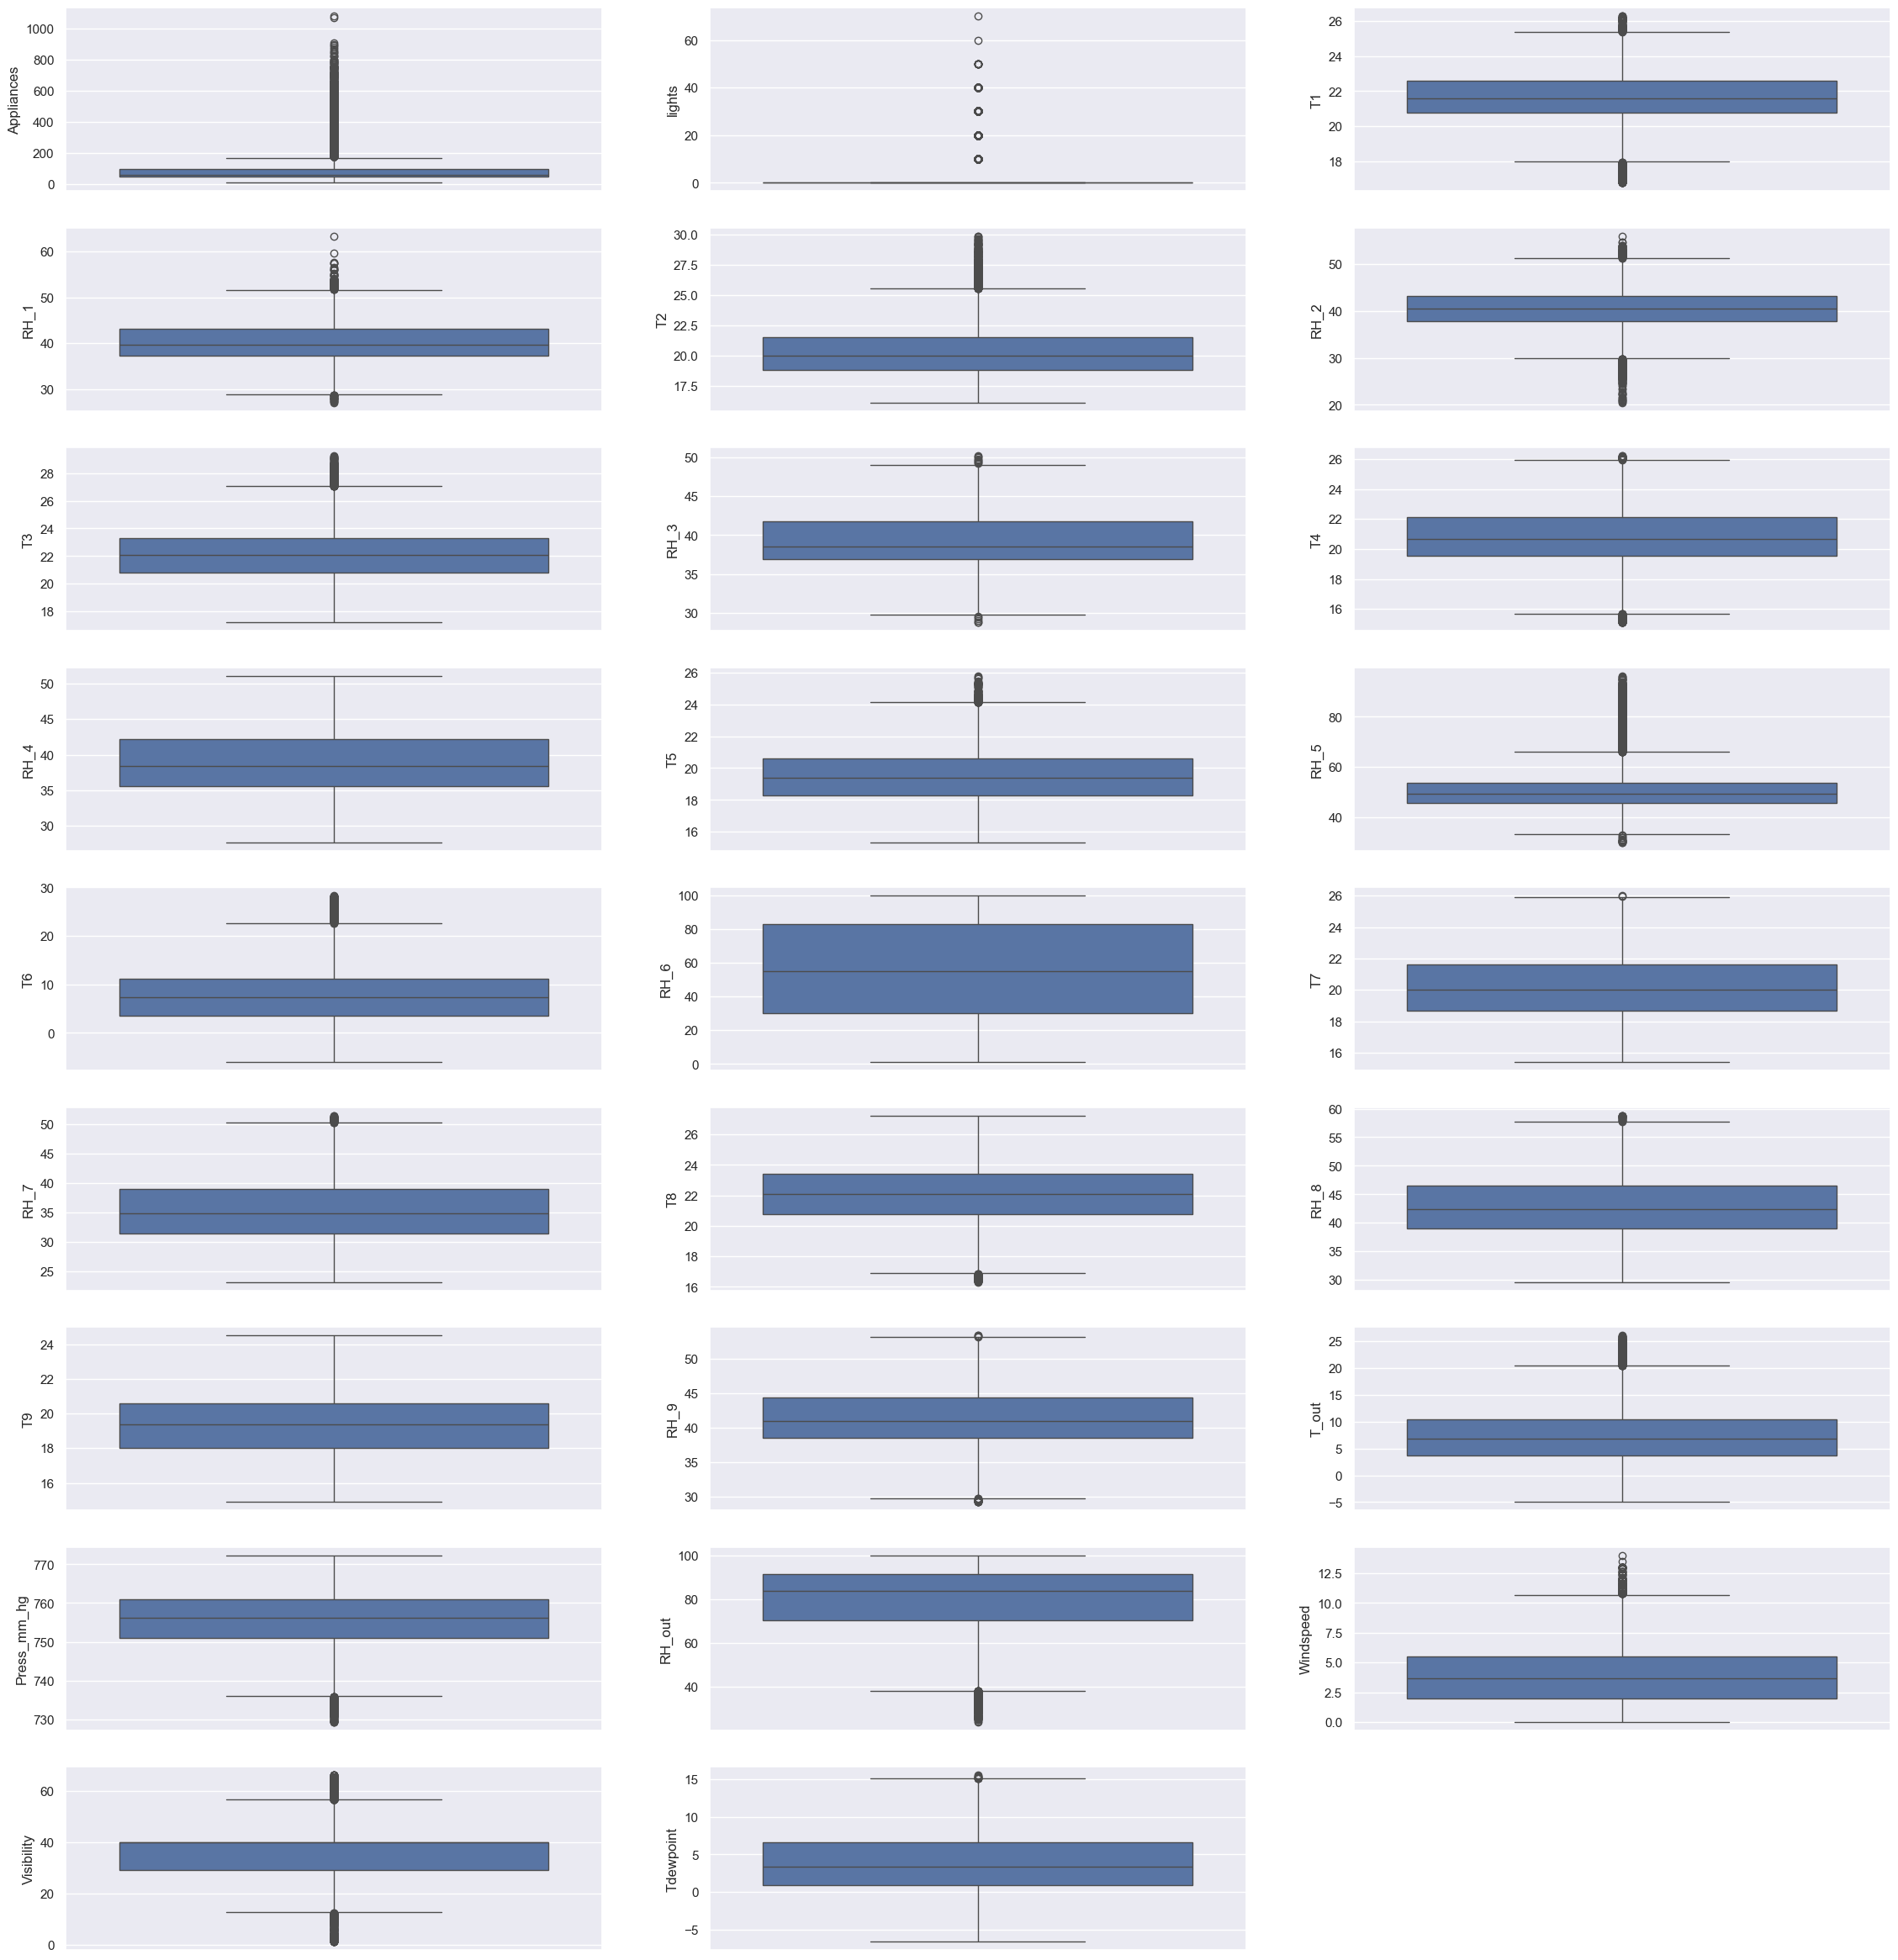

In [341]:
fig = plt.figure()
fig.set_size_inches(28,30)
columns = list_col
for i, col in enumerate(columns, 1):
    plt.subplot(9,3,i)
    sns.boxplot(y=data[col])
    plt.tight_layout

plt.show()

#### Plots to understand the effect of various variables on appliance energy consumption.

<Axes: xlabel='lights', ylabel='Appliances'>

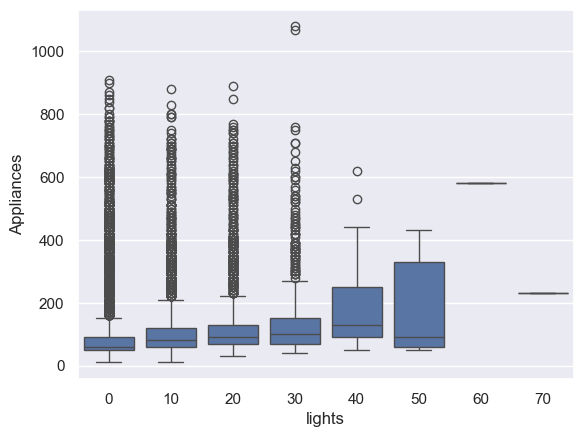

In [343]:
sns.boxplot(data, x='lights', y = 'Appliances')

<Axes: xlabel='T1', ylabel='T_out'>

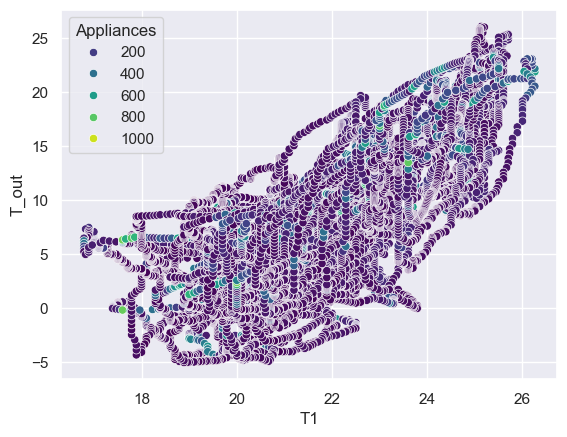

In [344]:
sns.scatterplot(data,x='T1',y='T_out',hue='Appliances',palette='viridis')           # Appliance energy consumption by temperature outside and in kitchen area

<Axes: xlabel='RH_1', ylabel='RH_out'>

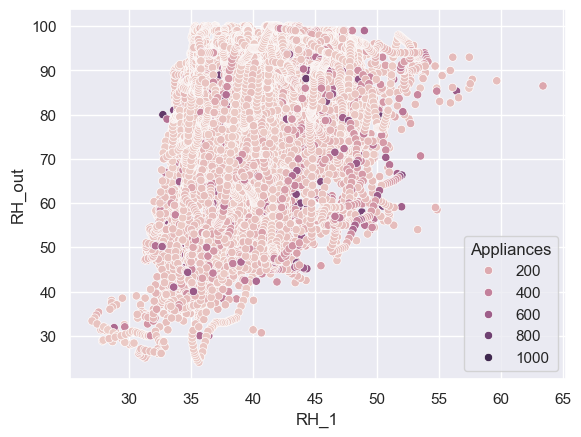

In [345]:
sns.scatterplot(data,x='RH_1',y='RH_out',hue='Appliances')           # Appliance energy consumption by humidity outside and in kitchen area

<Axes: xlabel='T2', ylabel='T_out'>

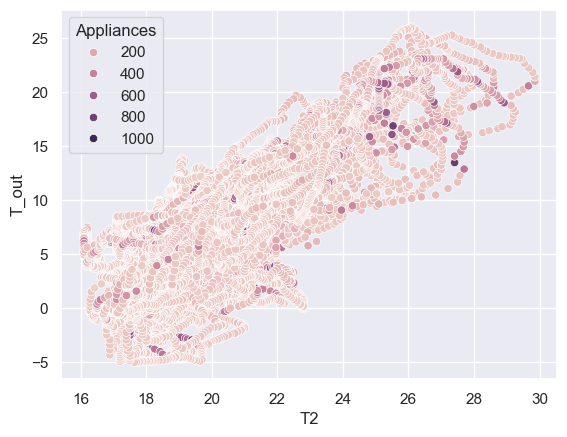

In [346]:
sns.scatterplot(data,x='T2',y='T_out',hue='Appliances')  # Appliance energy consumption by temperature outside and in living room

<Axes: xlabel='RH_2', ylabel='RH_out'>

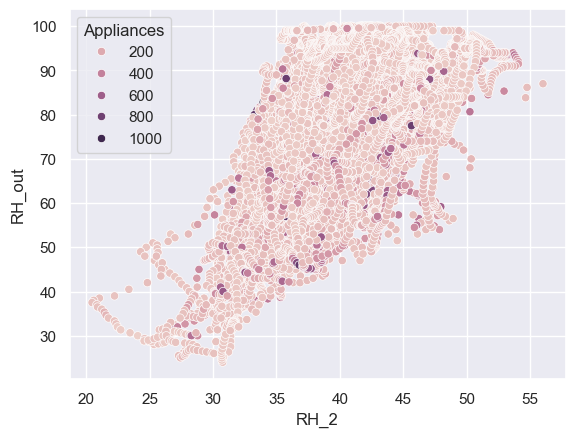

In [347]:
sns.scatterplot(data,x='RH_2',y='RH_out',hue='Appliances')           # Appliance energy consumption by humidity outside and in living room

<Axes: xlabel='T3', ylabel='T_out'>

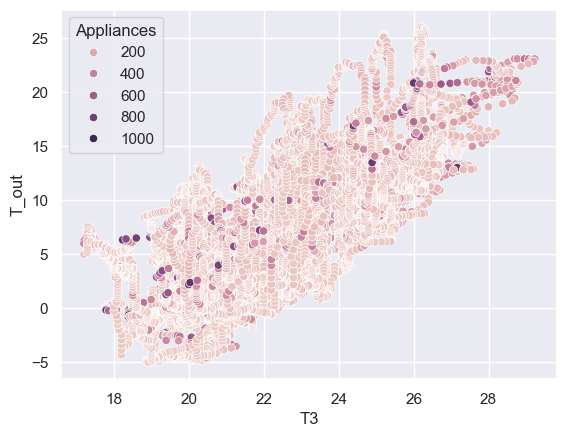

In [348]:
sns.scatterplot(data,x='T3',y='T_out',hue='Appliances')           # Appliance energy consumption by temperature outside and in laundry room

<Axes: xlabel='RH_3', ylabel='RH_out'>

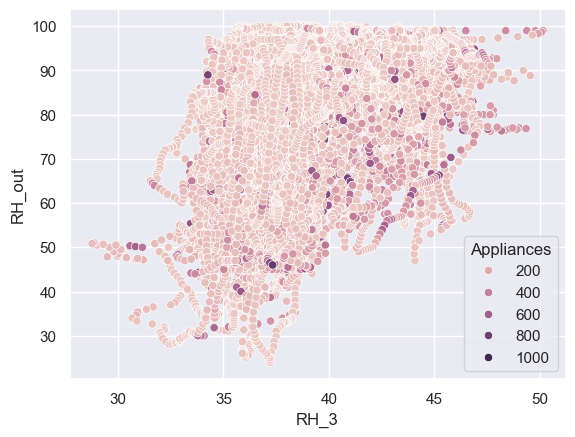

In [349]:
sns.scatterplot(data,x='RH_3',y='RH_out',hue='Appliances')           # Appliance energy consumption by humidity outside and in laundry room

<Axes: xlabel='T4', ylabel='T_out'>

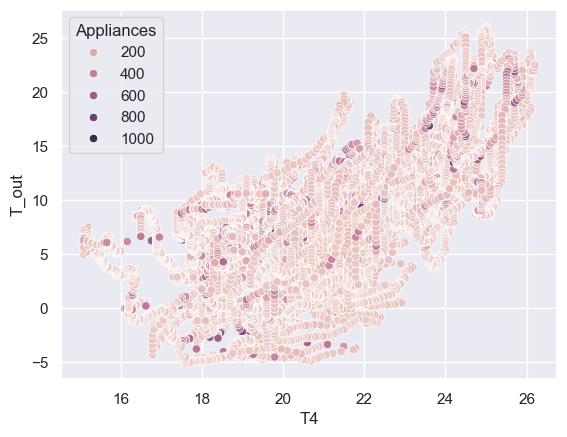

In [350]:
sns.scatterplot(data,x='T4',y='T_out',hue='Appliances')  # Appliance energy consumption by temperature outside and in office room

<Axes: xlabel='RH_4', ylabel='RH_out'>

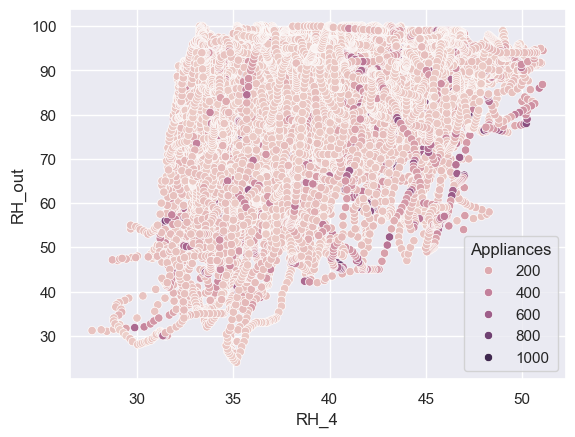

In [351]:
sns.scatterplot(data,x='RH_4',y='RH_out',hue='Appliances')           # Appliance energy consumption by humidity outside and in office room

<Axes: xlabel='T6', ylabel='T_out'>

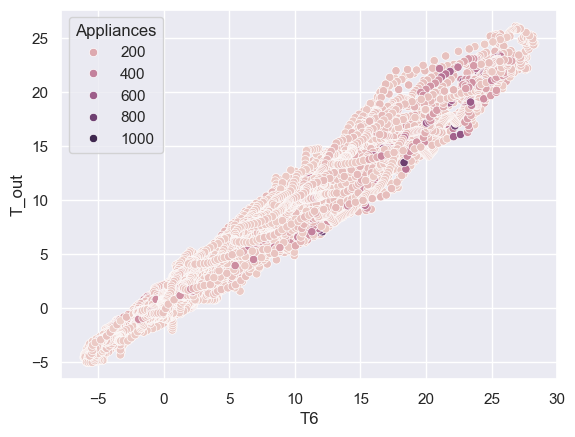

In [352]:
sns.scatterplot(data,x='T6',y='T_out',hue='Appliances')  # Appliance energy consumption by temperature outside and outside the building

<Axes: xlabel='T8', ylabel='T_out'>

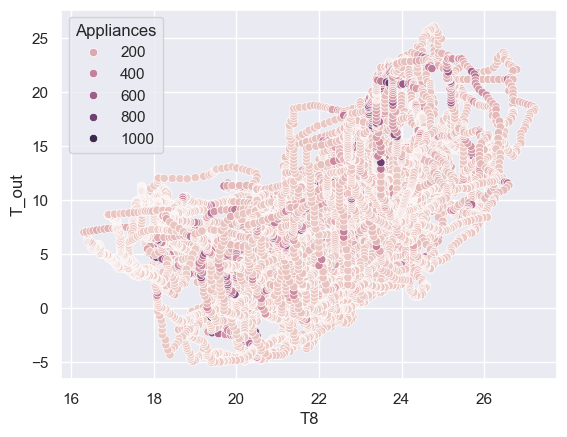

In [353]:
sns.scatterplot(data,x='T8',y='T_out',hue='Appliances')  # Appliance energy consumption by temperature outside and in the teenager room

<Axes: xlabel='T9', ylabel='T_out'>

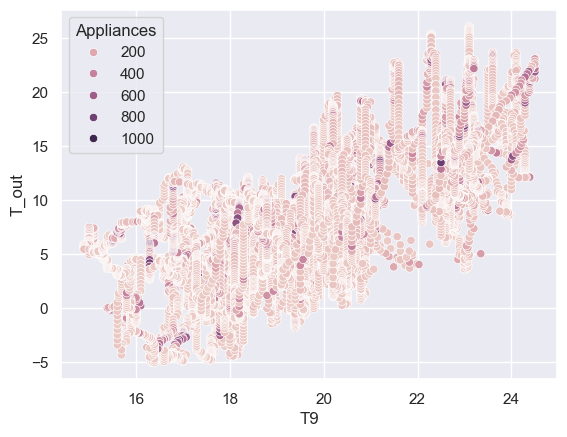

In [354]:
sns.scatterplot(data,x='T9',y='T_out',hue='Appliances')  # Appliance energy consumption by temperature outside and in the parent's room

<Axes: xlabel='Windspeed', ylabel='Appliances'>

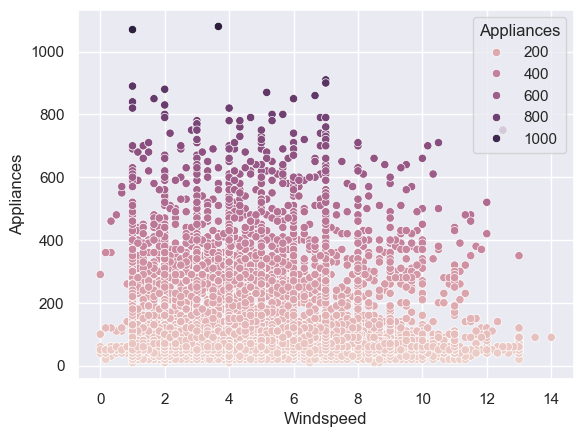

In [355]:
sns.scatterplot(data, x='Windspeed', y = 'Appliances',hue='Appliances')         # Appliance energy consumption by windspeed

<Axes: xlabel='T8', ylabel='Appliances'>

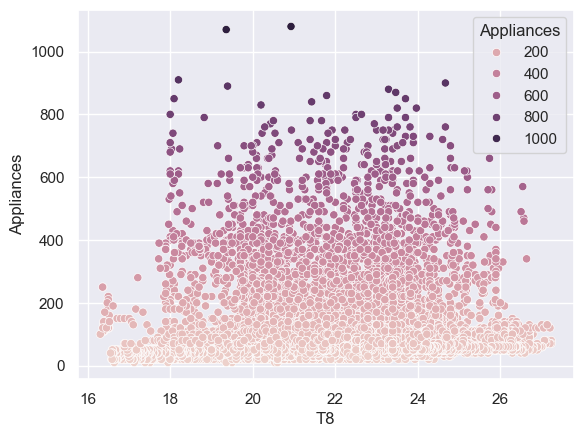

In [356]:
sns.scatterplot(data, x='T8', y = 'Appliances',hue='Appliances')         # Appliance energy consumption by temperature in teenager's room

<Axes: xlabel='T9', ylabel='Appliances'>

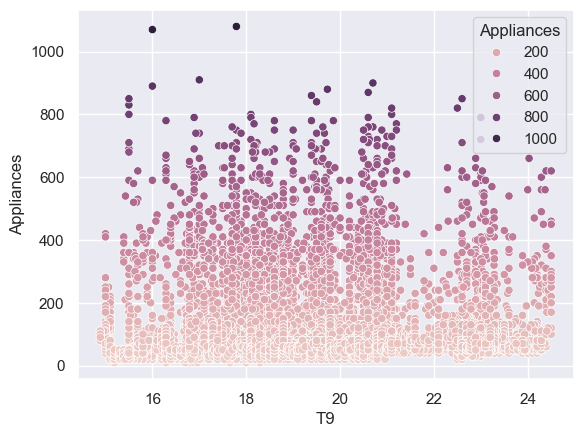

In [357]:
sns.scatterplot(data, x='T9', y = 'Appliances',hue='Appliances')         # Appliance energy consumption by temperature in parent's room

#### From the various scatterplots plotted in relation to various combinations of temperature features indicate that the outside temperature influences the temperatures inside and appliance consumption is also influenced by both these factors and higher consumption can be seen for specific temperature ranges. But it is hard to observe any absolute pattern.

<Axes: xlabel='Press_mm_hg', ylabel='Appliances'>

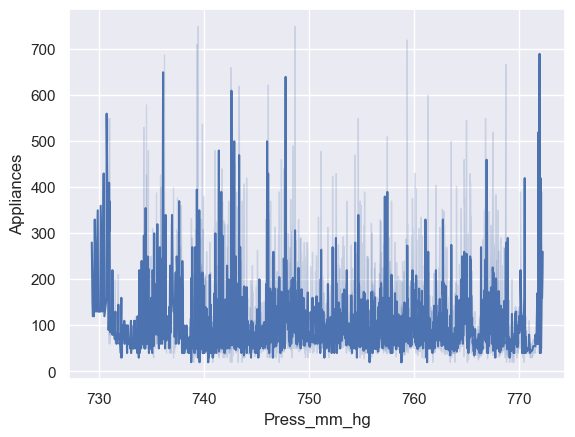

In [359]:
sns.lineplot(data, x = 'Press_mm_hg', y='Appliances' ,markers=True)         # Appliance energy consumption by pressure recorded from nearest weather station

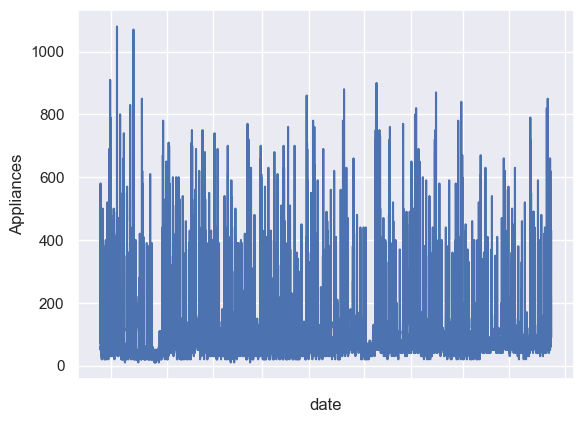

In [360]:
ax = sns.lineplot(data, x='date', y = 'Appliances',markers=True)         # Appliance energy consumption by date
ax.set(xticklabels=[])
plt.show()

#### To better understand the time variable, we will perform feature engineering and extract important features like day, month ,year, etc from it.

## Feature Engineering

##### Extracting month from date and creating a new column

In [364]:
data['month']=data['date'].dt.month

In [365]:
data['day_month'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['day_week'] = data['date'].dt.day_of_week

In [366]:
columns = ['month','day_month','day_week','hour','minute']
{col: data[col].nunique() for col in columns}

{'month': 5, 'day_month': 31, 'day_week': 7, 'hour': 24, 'minute': 6}

In [367]:
data['minute'].value_counts()

minute
0     3290
10    3289
20    3289
30    3289
40    3289
50    3289
Name: count, dtype: int64

In [368]:
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint  month  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3      1   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2      1   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1      1   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0      1   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9      1   

   day_month  hour  minute  day_week  
0         11    17       0         0  
1         11    17      10         0  
2         11    17      20         0  
3         11    17      30         0  
4         11    17      40         0

In [369]:
px.box(data,y = 'Appliances',x='hour')

In [370]:
px.box(data,y = 'Appliances',x='day_week')

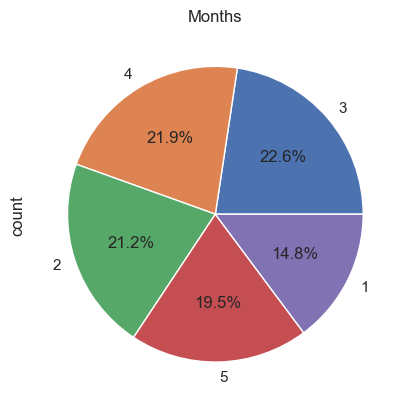

In [371]:
with sns.axes_style("white"):                               # makes the background of the plot 'plain white' and removes gridlines
    data.month.value_counts().plot.pie(autopct = "%.1f%%")  # creates a pie chart with each slice representing porportion of unique category in month column
    plt.title("Months")                                     # adds title to the chart
    plt.show()                                              # displays the output chart

In [372]:
px.box(data,y = 'Appliances',x='month')

<Axes: title={'center': 'Energy Consumption over the months'}, xlabel='month'>

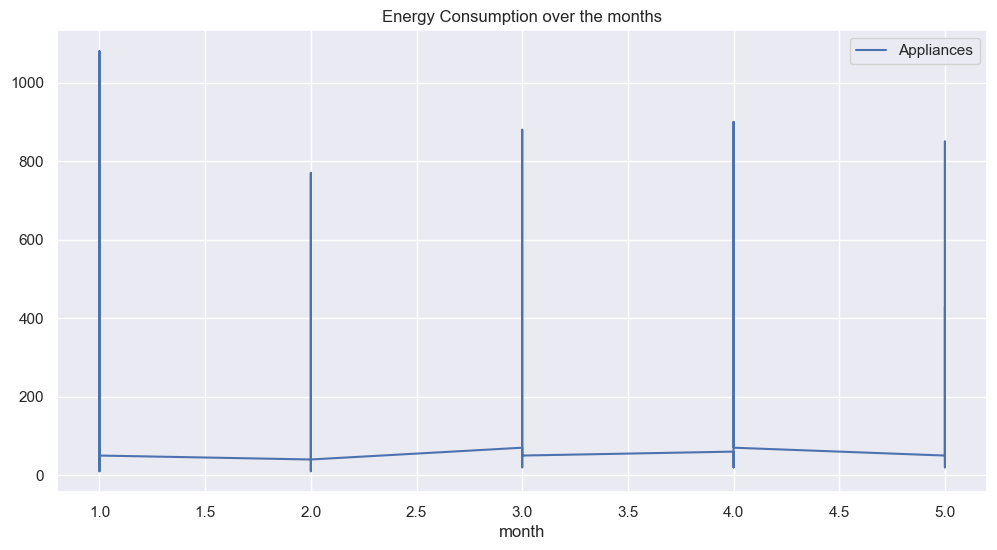

In [373]:
data.plot(x='month',y='Appliances',figsize=(12,6),title='Energy Consumption over the months')

## Data Transformation

We saw that there are a lot of outliers present in the dependent variable, some of which are very large and also it is skewed to the left. So, we will apply log transofrmation to the dependent variable.

In [376]:
data['log_Appliances'] = np.log1p(data['Appliances'])
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint  month  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3      1   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2      1   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1      1   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0      1   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9      1   

   day_month  hour  minute  day_week  log_Appliances  
0         11    17       0         0        4.110874  
1         11    17      10         0        4.110874  
2         11    17      20         0        3.931826  
3         11    17      30         0        3.931826  
4         11    17      40         0        4.110874

In [377]:
cols = ['Appliances','T1','lights','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','month','day_month','hour','minute','day_week','log_Appliances']

In [378]:
# Scaling the data using StandardScaler (standardization) before model building

In [379]:
df = data.copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cols])
df_scaled = pd.DataFrame(df_scaled,columns=cols)
df_scaled.head()

Appliances        T1    lights      RH_1        T2      RH_2        T3  \
0   -0.367676 -1.118645  3.301264  1.843821 -0.520411  1.073683 -1.235063   
1   -0.367676 -1.118645  3.301264  1.616807 -0.520411  1.057097 -1.235063   
2   -0.465215 -1.118645  3.301264  1.517959 -0.520411  1.033550 -1.235063   
3   -0.465215 -1.118645  4.561378  1.459321 -0.520411  1.024540 -1.235063   
4   -0.367676 -1.118645  4.561378  1.526336 -0.520411  1.009797 -1.235063   

       RH_3        T4      RH_4        T5      RH_5        T6      RH_6  \
0  1.686130 -0.908217  1.506438 -1.314903  0.471160 -0.145196  0.951798   
1  1.704566 -0.908217  1.604528 -1.314903  0.471160 -0.176941  0.945592   
2  1.748608 -0.944115  1.580918 -1.314903  0.458968 -0.221822  0.916484   
3  1.769092 -0.962063  1.542526 -1.314903  0.458968 -0.242621  0.925045   
4  1.769092 -0.962063  1.497991 -1.296832  0.458968 -0.253567  0.972238   

         T7      RH_7        T8      RH_8        T9      RH_9     T_out  \
0 -1.453646  1.219861 -1.957509  1.141572 -1.217324  0.958136 -0.152647   
1 -1.453646  1.206825 -1.957509  1.134554 -1.200778  0.965363 -0.174588   
2 -1.453646  1.182057 -1.957509  1.109032 -1.233869  0.950910 -0.196529   
3 -1.485243  1.154030 -2.008631  1.082233 -1.233869  0.926821 -0.218470   
4 -1.453646  1.142298 -2.008631  1.082233 -1.233869  0.926821 -0.240411   

   Press_mm_hg   RH_out  Windspeed  Visibility  Tdewpoint     month  \
0    -2.976328  0.82208   1.207694    2.091596   0.366975 -1.569369   
1    -2.962813  0.82208   1.071703    1.766584   0.343135 -1.569369   
2    -2.949298  0.82208   0.935713    1.441572   0.319294 -1.569369   
3    -2.935783  0.82208   0.799723    1.116559   0.295454 -1.569369   
4    -2.922268  0.82208   0.663733    0.791547   0.271613 -1.569369   

   day_month      hour    minute  day_week  log_Appliances  
0  -0.598455  0.794304 -1.463734 -1.499445       -0.321748  
1  -0.598455  0.794304 -0.878210 -1.499445       -0.321748  
2  -0.598455  0.794304 -0.292687 -1.499445       -0.597736  
3  -0.598455  0.794304  0.292836 -1.499445       -0.597736  
4  -0.598455  0.794304  0.878359 -1.499445       -0.321748

## Model Building

#### Linear Regression

In [382]:
X = df_scaled.drop(columns=['Appliances','log_Appliances'])
y = df_scaled['log_Appliances']

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [384]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)           # training the model on training set

LinearRegression()

In [385]:
y_pred = model_1.predict(X_test)     # testing the performance on test data

In [386]:
print('Accuracy of linear regression on test set: {:2f}'.format(model_1.score(X_test,y_test)))

Accuracy of linear regression on test set: 0.287342


In [387]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [388]:
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 0.84
R-squared: 0.29
MAE: 0.60


#### Ridge Regression

In [390]:
model_2 = Ridge(alpha=1.00)     # alpha is the regularization strength
model_2.fit(X_train,y_train)

Ridge()

In [391]:
y_pred_ridge = model_2.predict(X_test)

In [392]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

In [393]:
print(f'RMSE: {rmse_ridge:.2f}')
print(f'R-squared: {r2_ridge:.2f}')
print(f'MAE: {mae_ridge:.2f}')

RMSE: 0.84
R-squared: 0.29
MAE: 0.60


#### Lasso Regression

In [395]:
model_3 = Lasso(alpha=0.01)     # alpha is the regularization strength
model_3.fit(X_train,y_train)

Lasso(alpha=0.01)

In [396]:
y_pred_lasso = model_3.predict(X_test)

In [397]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

In [398]:
print(f'RMSE: {rmse_lasso:.2f}')
print(f'R-squared: {r2_lasso:.2f}')
print(f'MAE: {mae_lasso:.2f}')

RMSE: 0.85
R-squared: 0.27
MAE: 0.60


#### Random Forest Regressor

In [400]:
X_2 = df.drop(columns=['Appliances','log_Appliances','date'])
y_2 = df['log_Appliances']

In [401]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [402]:
model_4 = RandomForestRegressor(n_estimators=100,random_state=42)

In [403]:
model_4.fit(X_train_1, y_train_1)

RandomForestRegressor(random_state=42)

In [404]:
y_pred_rf = model_4.predict(X_test_1)

In [405]:
r2_rf = r2_score(y_test_1, y_pred_rf)

In [406]:
print(f'R-squared: {r2_rf:.4f}')

R-squared: 0.7121


In [407]:
# de-scaling the log-tranformation using the exponential function

In [408]:
y_pred_or_rf = np.expm1(y_pred_rf)
y_test_or_rf = np.expm1(y_test_1)
rmse_or_rf = np.sqrt(mean_squared_error(y_test_or_rf, y_pred_or_rf))
print(f'Original RMSE after de-scaling the log transformed target: {rmse_or_rf:.2f}')
mae_or_rf = mean_absolute_error(y_test_or_rf, y_pred_or_rf)
print(f'Original MAE after de-scaling the log transformed target: {mae_or_rf:.2f}')

Original RMSE after de-scaling the log transformed target: 67.99
Original MAE after de-scaling the log transformed target: 28.56


#### Defining the hyperparameters

In [410]:
rf_params = {
    'n_estimators':[50,100,200,500],
    'max_depth': [5,10,20,None],
    'min_samples_split':[2,5,10]
}

#### Random Forest Regressor with hyperparameter tuning

In [412]:
model_rf = RandomForestRegressor(random_state=0)

In [413]:
rf_grid = GridSearchCV(model_rf,rf_params,scoring='r2',cv=5,n_jobs=-1)

In [414]:
rf_grid.fit(X_train_1,y_train_1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='r2')

In [415]:
print(f'Best Random Forest Alpha: ',rf_grid.best_params_)
print(f'Best Random Forest R2: ',rf_grid.best_score_)

Best Random Forest Alpha:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best Random Forest R2:  0.6627694011917258


#### We have achieved a R2 value of 0.6627 with Random Forest Regressor model having the above parameters for the training data. Now we will evaluate it's performance on the test set.

In [417]:
best_rf = rf_grid.best_estimator_

In [418]:
y_pred_rf_hyper = best_rf.predict(X_test_1)

In [419]:
r2_rf_hyper = r2_score(y_test_1,y_pred_rf_hyper)
print(f'Final R2-score after tuning: ',r2_rf_hyper)

Final R2-score after tuning:  0.7175613739612628


In [420]:
y_pred_or_rf_hyper = np.expm1(y_pred_rf_hyper)
y_test_or_rf_hyper = np.expm1(y_test_1)
rmse_or_rf_hyper = np.sqrt(mean_squared_error(y_test_or_rf_hyper, y_pred_or_rf_hyper))
mae_or_rf_hyper = mean_absolute_error(y_test_or_rf_hyper, y_pred_or_rf_hyper)
print(f'Original RMSE after de-scaling the log transformed target: {rmse_or_rf_hyper:.2f}')
print(f'Original MAE after de-scaling the log transformed target: {mae_or_rf_hyper:.2f}')

Original RMSE after de-scaling the log transformed target: 67.81
Original MAE after de-scaling the log transformed target: 28.41


#### This model explains ~72% of the variance which is good considering the real-world energy data that we have which can be noisy and depends on many random factors. Also this is the average accuracy after applying 5-fold cross validation(CV) and it is very close to the accuracy of the model that we ran earlier without any hyperparameter tuning and cross-validation.

#### The final Random Forest Regressor model after hyperparameter tuning generalizes well and there are no signs of overfitting.
#### The model performance is good considering the real-world energy data that we have which can be noisy and depends on many random factors.

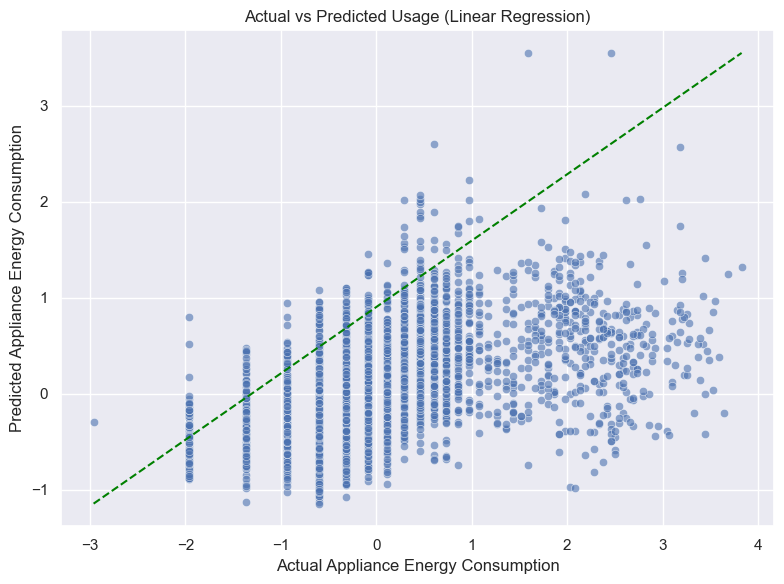

In [423]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred,alpha=0.6)
plt.plot([y_test.min(),y_test.max()],                    # Adding a reference line such that if the predictions are perfect all the pints will lie on this line
         [y_pred.min(),y_pred.max()],
        '--',color='green')
plt.xlabel("Actual Appliance Energy Consumption")
plt.ylabel("Predicted Appliance Energy Consumption")
plt.title("Actual vs Predicted Usage (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

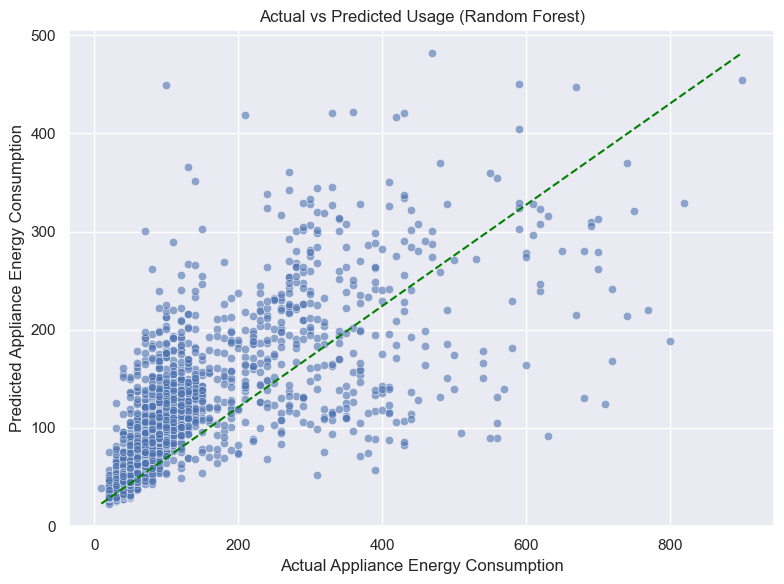

In [424]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_or_rf_hyper,y=y_pred_or_rf_hyper,alpha=0.6)
plt.plot([y_test_or_rf_hyper.min(),y_test_or_rf_hyper.max()],
         [y_pred_or_rf_hyper.min(),y_pred_or_rf_hyper.max()],
        '--',color='green')
plt.xlabel("Actual Appliance Energy Consumption")
plt.ylabel("Predicted Appliance Energy Consumption")
plt.title("Actual vs Predicted Usage (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Feature importance for the best model

In [426]:
imp = best_rf.feature_importances_
imp_feat = X_train_1.columns

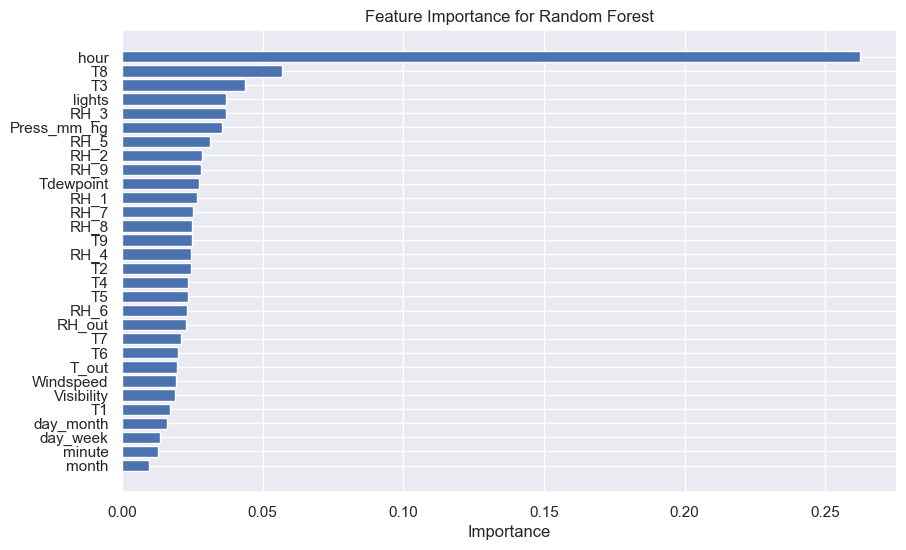

In [427]:
imp_feat_df = pd.DataFrame({'Feature':imp_feat, 'Importance':imp})
imp_feat_df = imp_feat_df.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,6))
plt.barh(imp_feat_df['Feature'],imp_feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance for Random Forest')
plt.xlabel("Importance")
plt.show()